In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib qt
%matplotlib inline
import missingno as misno

In [2]:
df=pd.read_csv("seconde quality april.csv")
dfn=pd.read_csv("avril defect-departement.csv")

In [3]:
df.head()

,order,Customer,Stayle code,Garment,Quantity requested,Quantity cutted,CUTTING,EMBROIDERY,PRINTING,Sewing,Washing,Finishing,Total,Quantity shipped,Quantity missed
0,T214680,SNC SQUARE,MP101-WS,POLO,4590.00,4606.0,23,0,15,25,0,12,75,NaN,NaN
1,T214704,TAYAL,MJ801,JOGGER,612.00,656.0,51,0,0,9,0,7,67,NaN,NaN
2,T217013,Le printemps,BT113,T-SHIRT,4324.32,4347.0,13,0,59,4,0,10,86,NaN,NaN
3,T217014,Le printemps,BT109,T-SHIRT,4324.32,4326.0,3,0,4,5,0,3,15,NaN,NaN
4,T217019,Le printemps,BT114,T-SHIRT,4324.32,4354.0,30,0,13,16,0,21,80,77.0,3.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order               198 non-null    object 
 1   Customer            198 non-null    object 
 2   Stayle code         198 non-null    object 
 3   Garment             198 non-null    object 
 4   Quantity requested  198 non-null    float64
 5   Quantity cutted     197 non-null    float64
 6   CUTTING             198 non-null    int64  
 7   EMBROIDERY          198 non-null    int64  
 8   PRINTING            198 non-null    int64  
 9   Sewing              198 non-null    int64  
 10  Washing             198 non-null    int64  
 11  Finishing           198 non-null    int64  
 12  Total               198 non-null    int64  
 13  Quantity shipped    176 non-null    float64
 14  Quantity missed     176 non-null    float64
dtypes: float64(4), int64(7), object(4)
memory usage: 23.3+ KB

In [5]:
df.isnull().sum()

order                  0
Customer               0
Stayle code            0
Garment                0
Quantity requested     0
Quantity cutted        1
CUTTING                0
EMBROIDERY             0
PRINTING               0
Sewing                 0
Washing                0
Finishing              0
Total                  0
Quantity shipped      22
Quantity missed       22
dtype: int64

Text(0.5, 1.0, 'Presentation of missing values')

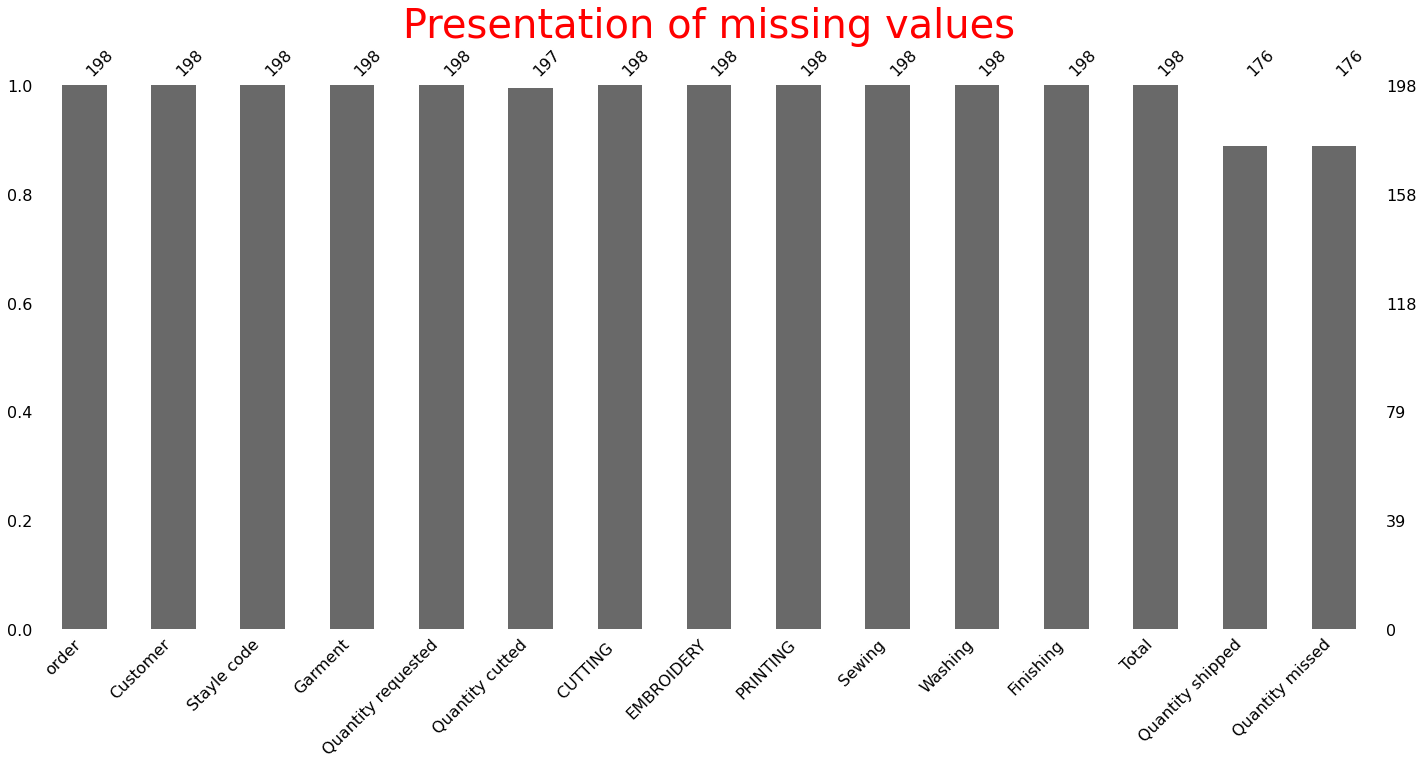

In [6]:
misno.bar(df)
plt.title("Presentation of missing values", fontsize=40, color= 'red')


### Handling missing values

In [7]:
df['Quantity cutted']=df['Quantity cutted'].fillna(df['Quantity cutted'].mean())

In [8]:
df['Quantity cutted'].isnull().sum()

0

In [9]:
df.iloc[125]

order                 T220437
Customer                  PMG
Stayle code             BP114
Garment                  Polo
Quantity requested     1134.0
Quantity cutted        1084.0
CUTTING                    94
EMBROIDERY                  2
PRINTING                    2
Sewing                      2
Washing                     0
Finishing                   0
Total                     100
Quantity shipped         98.0
Quantity missed           2.0
Name: 125, dtype: object

In [10]:
df.isnull().sum()

order                  0
Customer               0
Stayle code            0
Garment                0
Quantity requested     0
Quantity cutted        0
CUTTING                0
EMBROIDERY             0
PRINTING               0
Sewing                 0
Washing                0
Finishing              0
Total                  0
Quantity shipped      22
Quantity missed       22
dtype: int64

#### Seconde Quality %

In [11]:
df['Total'].sum()/df['Quantity cutted'].sum()*100

2.488110281552018

In [12]:
second_quality_qt=df['Total'].sum()
first_quality_qt=df['Quantity cutted'].sum()-df['Total'].sum()

In [13]:
second_quality_qt

9712

In [14]:
first_quality_qt

380624.39593908633

([<matplotlib.patches.Wedge at 0x1c8a5dc8610>,
 [Text(-1.0966412219629456, 0.08589546141454665, 'First Quality'),
  Text(1.395725183912637, -0.10932159435370377, 'Second Quality')],
 [Text(-0.5981679392525157, 0.04685206986247999, '97.5%'),
  Text(0.897251903943838, -0.07027816779880955, '2.5%')])

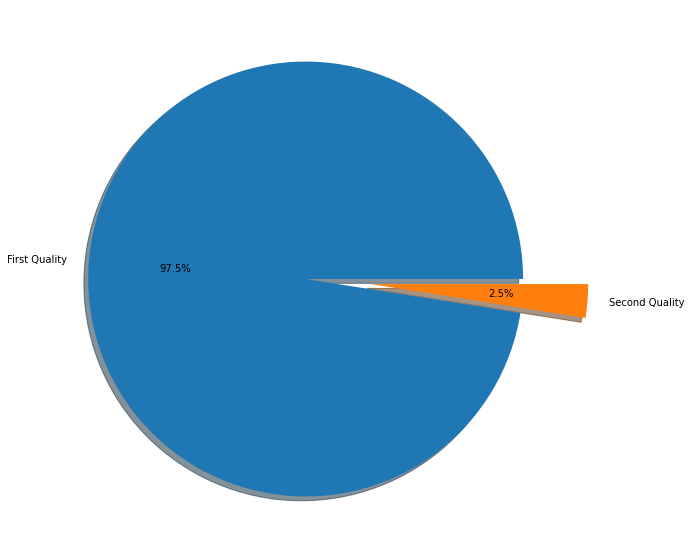

In [15]:
data=[first_quality_qt,second_quality_qt]
lables=['First Quality','Second Quality']
a=[0,0.3]
plt.figure(figsize=(20,10))
plt.pie(data,labels=lables, explode=a,shadow=True, autopct='%1.1f%%')

Second Quality in each departement

In [16]:
cutting=df['CUTTING '].sum()
embroidery=df['EMBROIDERY'].sum()
printing=df['PRINTING'].sum()
sewing=df['Sewing'].sum()
washing=df['Washing'].sum()
finishing=df['Finishing'].sum()

<BarContainer object of 6 artists>

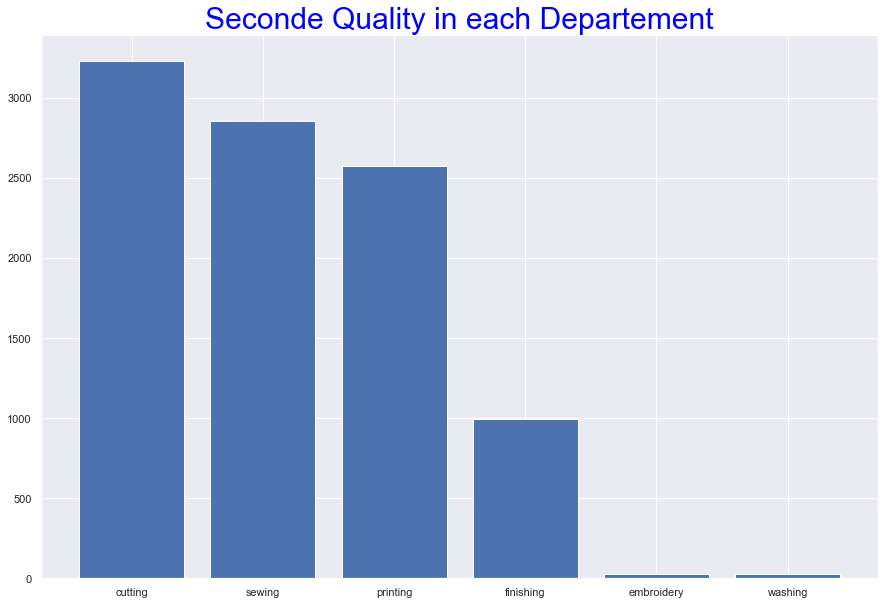

In [17]:
d ={ 'a': ['cutting','embroidery','printing','sewing','washing','finishing'],
        'b' : [cutting,embroidery,printing,sewing,washing,finishing]}
df2=pd.DataFrame(data=d)
df2_sorted=df2.sort_values('b',ascending=False)
plt.figure(figsize=(15,10))
sns.set(style='darkgrid')
plt.title("Seconde Quality in each Departement",fontsize=30,color='Blue')
plt.bar('a','b',data=df2_sorted)

([<matplotlib.patches.Wedge at 0x1c8a5e98bb0>,
 [Text(0.5516426820677968, 0.9516776509517537, 'cutting'),
  Text(-0.555332570583995, 0.9495292181120982, 'embroidery'),
  Text(-1.078234468000049, 0.21773936717243203, 'printing'),
  Text(-0.014944135699986202, -1.0998984829556684, 'sewing'),
  Text(0.8742746892602388, -0.6675655531248695, 'washing'),
  Text(1.0436267525946035, -0.34762508722593977, 'finishing')],
 [Text(0.3008960084006164, 0.5190969005191384, '33.28%'),
  Text(-0.3029086748639972, 0.5179250280611444, '0.29%'),
  Text(-0.5881278916363903, 0.11876692754859927, '26.52%'),
  Text(-0.008151346745447019, -0.5999446270667281, '29.39%'),
  Text(0.4768771032328575, -0.36412666534083793, '0.29%'),
  Text(0.5692509559606928, -0.18961368394142167, '10.23%')])

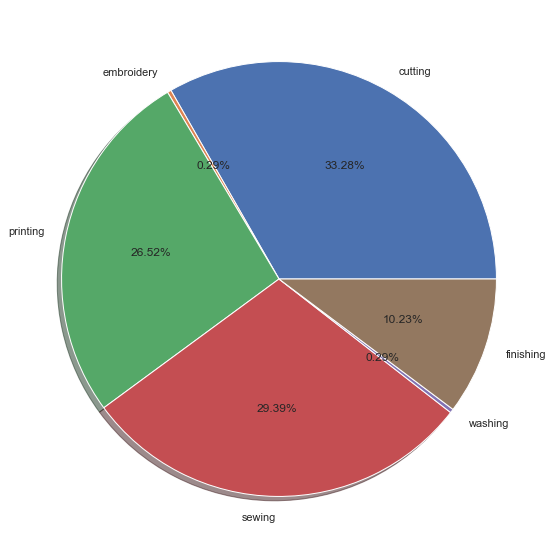

In [18]:
plt.figure(figsize=(20,10))
plt.pie(df2['b'],labels=df2['a'],shadow=True, autopct='%1.2f%%')

## Cutting Departement

In [19]:
dfn.head()

,defects,CUTTING,EMBROIDERY,FINISHING,PRINTING,SEWING,WASHING
0,BAD REPAIR,NaN,NaN,NaN,NaN,112.0,NaN
1,CUT OF SCISSORS,NaN,NaN,131.0,NaN,NaN,NaN
2,DAMAGE EM,NaN,13.0,NaN,NaN,NaN,NaN
3,DAMAGE P,NaN,NaN,NaN,365.0,NaN,NaN
4,DAMAGE WASHING,NaN,NaN,NaN,NaN,NaN,1.0


In [20]:
dfn=dfn.fillna(0)

In [21]:
dfn.head()

,defects,CUTTING,EMBROIDERY,FINISHING,PRINTING,SEWING,WASHING
0,BAD REPAIR,0.0,0.0,0.0,0.0,112.0,0.0
1,CUT OF SCISSORS,0.0,0.0,131.0,0.0,0.0,0.0
2,DAMAGE EM,0.0,13.0,0.0,0.0,0.0,0.0
3,DAMAGE P,0.0,0.0,0.0,365.0,0.0,0.0
4,DAMAGE WASHING,0.0,0.0,0.0,0.0,0.0,1.0


In [22]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   defects      20 non-null     object 
 1   CUTTING      20 non-null     float64
 2   EMBROIDERY   20 non-null     float64
 3   FINISHING    20 non-null     float64
 4   PRINTING     20 non-null     float64
 5   SEWING       20 non-null     float64
 6   WASHING      20 non-null     float64
dtypes: float64(6), object(1)
memory usage: 1.2+ KB


In [23]:
dfn.describe()

,CUTTING,EMBROIDERY,FINISHING,PRINTING,SEWING,WASHING
count,20.00000,20.000000,20.00000,20.000000,20.000000,20.000000
mean,41.25000,1.050000,15.95000,31.450000,33.100000,0.300000
std,120.72364,3.332061,49.95627,88.623672,83.591677,1.128576
min,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,0.00000,0.000000,0.00000,0.000000,22.250000,0.000000
max,459.00000,13.000000,188.00000,365.000000,359.000000,5.000000


<BarContainer object of 3 artists>

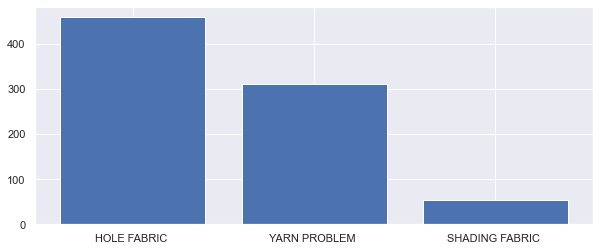

In [24]:
dfcutting=dfn[dfn['CUTTING ']>0].sort_values('CUTTING ',ascending=False)
plt.figure(figsize=(10,4))
plt.bar('defects','CUTTING ',data=dfcutting)

#plt.figure(figsize=(40,10))
#sns.barplot(x='defects', y=dfn[dfn['CUTTING ']>0],data=dfn)
#plt.show()

## Sewing Departement 

<BarContainer object of 7 artists>

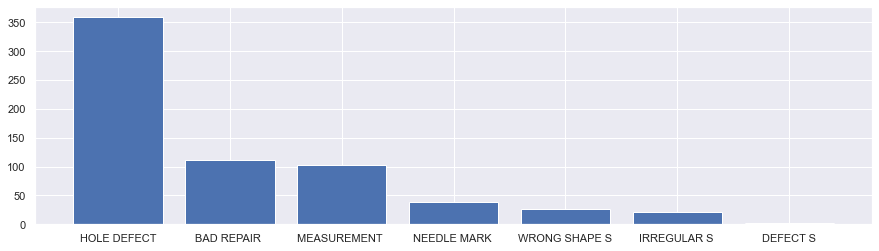

In [25]:
dfsewing=dfn[dfn['SEWING ']>0].sort_values('SEWING ',ascending=False)
plt.figure(figsize=(15,4))
plt.bar('defects','SEWING ',data=dfsewing)

## Printing Departement

<BarContainer object of 4 artists>

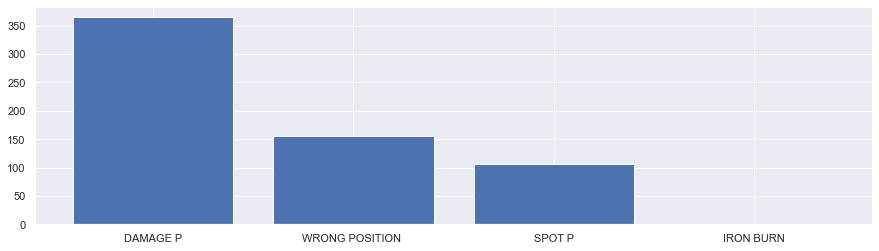

In [26]:
dfprinting=dfn[dfn['PRINTING ']>0].sort_values('PRINTING ',ascending=False)
plt.figure(figsize=(15,4))
plt.bar('defects','PRINTING ',data=dfprinting)

## Finishing Departement

<BarContainer object of 2 artists>

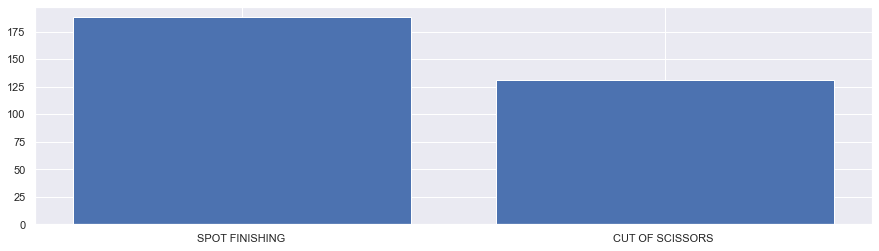

In [27]:
dffinishing=dfn[dfn['FINISHING ']>0].sort_values('FINISHING ',ascending=False)
plt.figure(figsize=(15,4))
plt.bar('defects','FINISHING ',data=dffinishing)

## Embroidery Departement

<BarContainer object of 2 artists>

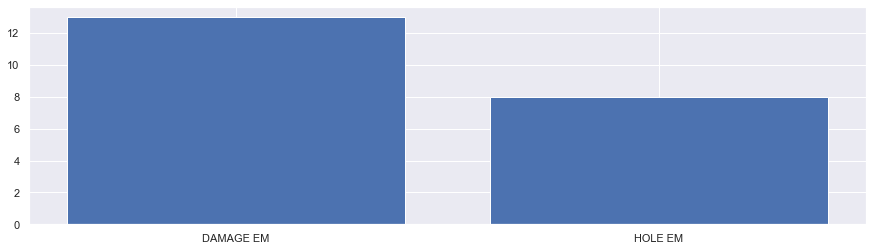

In [28]:
dfembroidery=dfn[dfn['EMBROIDERY ']>0].sort_values('EMBROIDERY ',ascending=False)
plt.figure(figsize=(15,4))
plt.bar('defects','EMBROIDERY ',data=dfembroidery)

## Washing Departement

<BarContainer object of 2 artists>

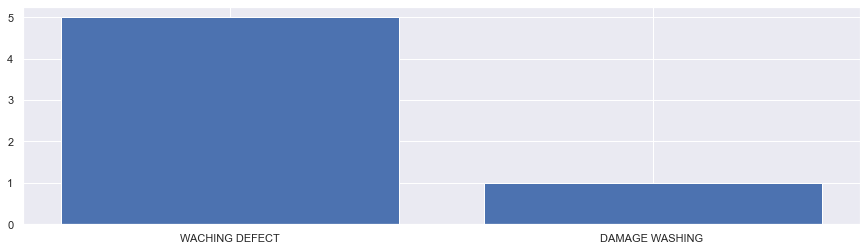

In [29]:
dfwashing=dfn[dfn['WASHING ']>0].sort_values('WASHING ',ascending=False)
plt.figure(figsize=(15,4))
plt.bar('defects','WASHING ',data=dfwashing)

### Analysis defect by each Garment

<AxesSubplot:xlabel='Garment'>

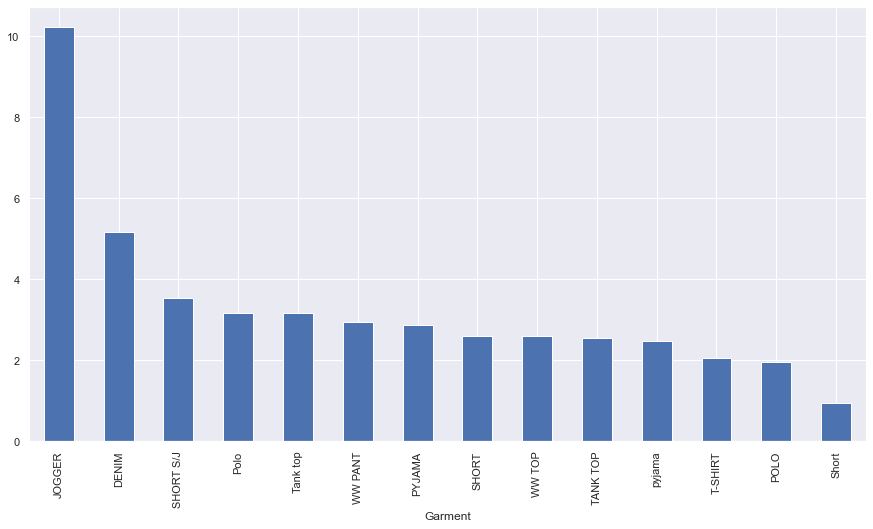

In [30]:
d=df.groupby(['Garment']).aggregate({ 'Quantity cutted':np.sum,
                                     'Total':np.sum,
                                     'Garment':np.max,
                                     'CUTTING ':np.sum,
                                     'EMBROIDERY':np.sum,
                                     'PRINTING':np.sum,
                                     'Sewing':np.sum,
                                     'Washing':np.sum,
                                     'Finishing':np.sum,
    })
d['percentage']=d['Total']/d['Quantity cutted']*100
dsorted=d.sort_values('percentage',ascending=False)
plt.figure(figsize=(15,8))
dsorted['percentage'].plot(kind = "bar")


We have percentage of second quality jogger and denim more than others

We will check the problem of Jogger and denim, whitch departement responsible for this issue ?

In [31]:
dsorted['perc/cutting']=dsorted['CUTTING ']/dsorted['Total']*100
dsorted['perc/sewing']=dsorted['Sewing']/dsorted['Total']*100
dsorted['perc/washing']=dsorted['Washing']/dsorted['Total']*100
dsorted['perc/finishing']=dsorted['Finishing']/dsorted['Total']*100
dsorted

,Quantity cutted,Total,Garment,CUTTING,EMBROIDERY,PRINTING,Sewing,Washing,Finishing,percentage,perc/cutting,perc/sewing,perc/washing,perc/finishing
Garment,,,,,,,,,,,,,,
JOGGER,656.000000,67,JOGGER,51,0,0,9,0,7,10.213415,76.119403,13.432836,0.000000,10.447761
DENIM,17701.000000,913,DENIM,430,0,0,291,27,165,5.157901,47.097481,31.872946,2.957284,18.072289
SHORT S/J,34755.000000,1231,SHORT S/J,213,0,203,700,0,115,3.541936,17.303006,56.864338,0.000000,9.341998
Polo,15294.000000,486,Polo,347,17,62,47,0,13,3.177717,71.399177,9.670782,0.000000,2.674897
Tank top,6486.000000,205,Tank top,18,0,125,35,0,27,3.160654,8.780488,17.073171,0.000000,13.170732
WW PANT,578.000000,17,WW PANT,11,0,0,0,0,6,2.941176,64.705882,0.000000,0.000000,35.294118
PYJAMA,19426.000000,559,PYJAMA,116,0,137,272,0,34,2.877587,20.751342,48.658318,0.000000,6.082290
SHORT,35368.000000,919,SHORT,153,0,358,361,0,47,2.598394,16.648531,39.281828,0.000000,5.114255
WW TOP,578.000000,15,WW TOP,12,0,0,0,0,3,2.595156,80.000000,0.000000,0.000000,20.000000


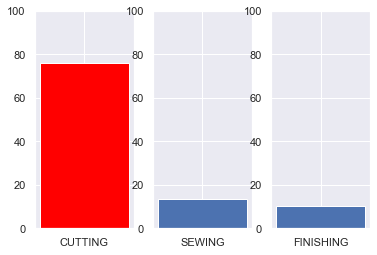

<Figure size 720x720 with 0 Axes>

In [32]:
t=dsorted.loc[['JOGGER']]
fig, ax=plt.subplots(nrows=1,ncols=3)
plt.figure(figsize=(10,10))
ax[0].set_ylim(bottom=0,top=100)
ax[1].set_ylim(bottom=0,top=100)
ax[2].set_ylim(bottom=0,top=100)
ax[0].bar('CUTTING',t['perc/cutting'],color='red')
ax[1].bar('SEWING',t['perc/sewing'])
ax[2].bar('FINISHING',t['perc/finishing'])
plt.show()

and now We will check the problem of denim, whitch departement responsible for this issue ?

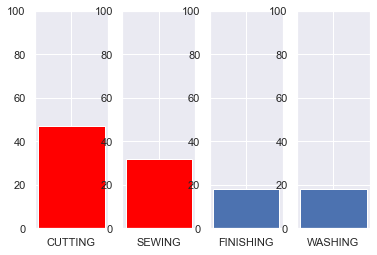

<Figure size 2160x720 with 0 Axes>

In [33]:
o=dsorted.loc[['DENIM']]
fig, at=plt.subplots(nrows=1,ncols=4)

plt.figure(figsize=(30,10))
at[0].set_ylim(bottom=0, top=100)
at[1].set_ylim(bottom=0, top=100)
at[2].set_ylim(bottom=0, top=100)
at[3].set_ylim(bottom=0, top=100)

#
#at[0,0].set_title('In Cutting Departement',fontsize=30)
#at[0,1].set_title('In Cutting Departement',fontsize=30)
#at[1,0].set_title('In Sewing Departement',fontsize=30)
#at[1,1].set_title('In Finishing Departement',fontsize=30)


# 
at[0].bar('CUTTING',o['perc/cutting'],color='red')
at[1].bar('SEWING',o['perc/sewing'], color='red')
at[2].bar('FINISHING',o['perc/finishing'])
at[3].bar('WASHING',o['perc/finishing'])
plt.show()

we will check in this section most quantity shiped to garment warehouse second quality

In [34]:
a=df.groupby(['Stayle code']).aggregate({ 
                                     'Quantity cutted':np.sum,
                                     'Garment':np.max, 'CUTTING ':np.sum, 'EMBROIDERY':np.sum, 'PRINTING':np.sum, 'Sewing':np.sum,
'Washing':np.sum,'Finishing':np.sum,    
    
                                     'Total':np.sum
    
}).sort_values('Total',ascending=False)

a=a.head(5)


<AxesSubplot:xlabel='Total', ylabel='Stayle code'>

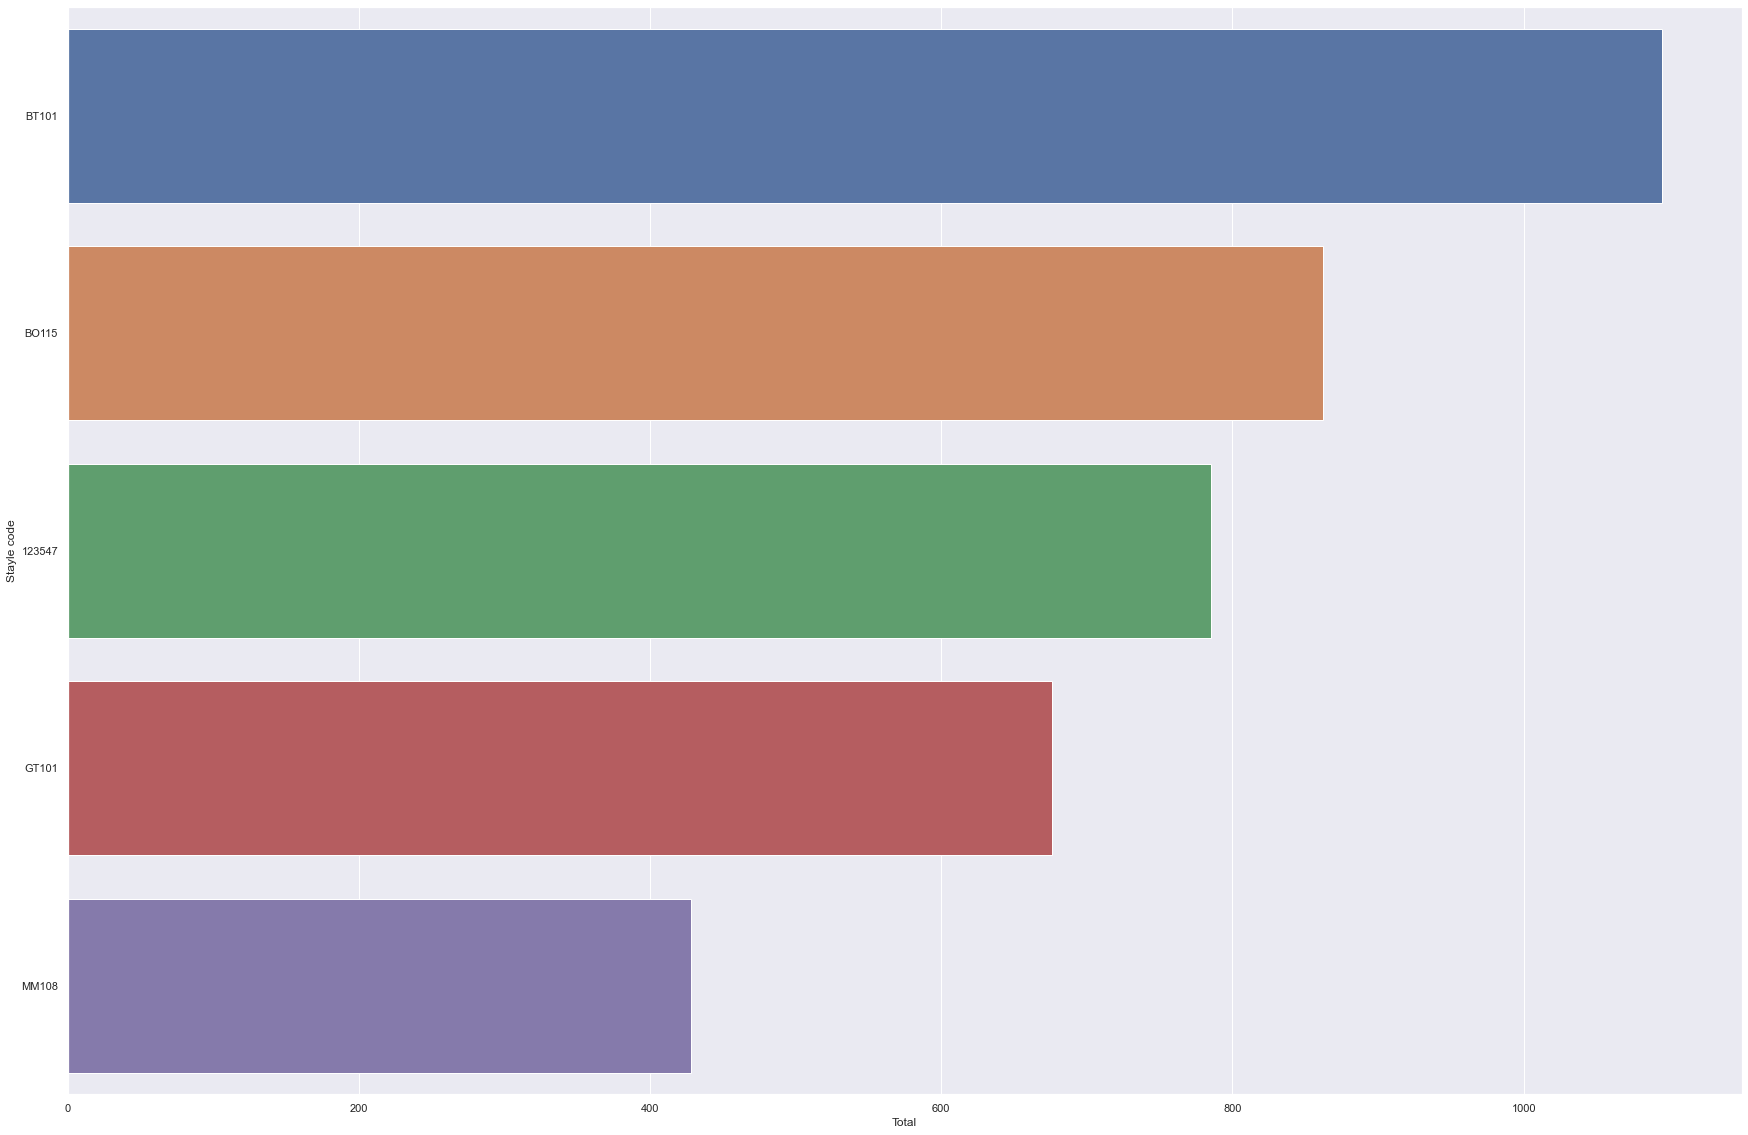

In [35]:
plt.figure(figsize=(30,20))
sns.barplot(y=a.index,x=a['Total'])